<a href="https://colab.research.google.com/github/juanmed/detectron2_instance_segmentation_demo/blob/master/Detectron2_custom_coco_data_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 12763, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 12763 (delta 119), reused 217 (delta 107), pack-reused 12502
Receiving objects: 100% (12763/12763), 5.46 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (9075/9075), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 18.9 MB/s 
     |████████████████████████████████| 130 kB 67.0 MB/s 
     |████████████████████████████████| 743 kB 56.1 MB/s 
     |████████████████████████████████| 722 kB 43.7 MB/s 
     |████████████████████████████████| 112 kB 70.9 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141229 sha256=47def3dd5c2d1dc6bde5759731a7bcfff0f3885098e88f73d61c81b3d666eb88
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb

In [ ]:
!python --version

Python 3.7.11


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on a custom COCO dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.

We use [the fruits nuts segmentation dataset](https://github.com/Tony607/mmdetection_instance_segmentation_demo)
which only has 3 classes: data, fig, and hazelnut.
We'll train a segmentation model from an existing model pre-trained on the COCO dataset, available in detectron2's model zoo.

Note that the COCO dataset does not have the "data", "fig" and "hazelnut" categories.

In [ ]:
!pip install gdown

In [ ]:
#import gdown
#import shutil
#https://drive.google.com/file/d/14ZcrZ9JbU8_XvCkGvq00xrZt2hioZjGv/view?usp=sharing
#url = 'https://drive.google.com/uc?id=14ZcrZ9JbU8_XvCkGvq00xrZt2hioZjGv'
#output = 'data.zip'
#gdown.download(url, output, quiet=False)

In [ ]:
#!unzip data.zip > /dev/null

In [ ]:
# Download test set
#https://drive.google.com/file/d/1IZpWoEfXUndLCVs0KWVnJxJuH0klxKUY/view?usp=sharing
#url = 'https://drive.google.com/uc?id=1IZpWoEfXUndLCVs0KWVnJxJuH0klxKUY'
#output = 'test.zip'
#gdown.download(url, output, quiet=False)

In [ ]:
#!unzip test.zip > /dev/null

In [ ]:
# Download full dataset
import gdown
import shutil
# smaller dataset: https://drive.google.com/file/d/1kix_r_P3YWa_3bI9JpBJ2hKzHF8WjA53/view?usp=sharing
# full dataset https://drive.google.com/file/d/1CKo1ls81LEOBM-HDuauOT1_Tb1f3Bh2W/view?usp=sharing
url = 'https://drive.google.com/uc?id=1CKo1ls81LEOBM-HDuauOT1_Tb1f3Bh2W'
output = 'dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CKo1ls81LEOBM-HDuauOT1_Tb1f3Bh2W
To: /content/dataset.zip
7.25GB [02:28, 48.9MB/s]


'dataset.zip'

In [ ]:
#Download person_keypoints_val2017 COCO annotations and images
# look for all the links here: https://github.com/liruilong940607/Pose2Seg
#!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [ ]:
#!unzip annotations_trainval2017.zip -d ./annotations_trainval2017/ > /dev/null

In [ ]:
#!wget http://images.cocodataset.org/zips/val2017.zip

In [ ]:
#!wget http://images.cocodataset.org/zips/train2017.zip

In [ ]:
#!unzip val2017.zip -d ./person_keypoints2017_val/ > /dev/null

In [ ]:
#!unzip train2017.zip -d ./person_keypoints2017_val/ > /dev/null

In [ ]:
!unzip dataset.zip > /dev/null

In [ ]:
!rm dataset.zip

In [ ]:
#download latest model
#ttps://drive.google.com/file/d/1lhBxaXSDzc8HaJFtXfLb9qcmS3VDyDnK/view?usp=sharing
# keypoint detection with segm model: https://drive.google.com/file/d/1-jINE-Q4BD1xt0KF95AfYn2vd_PQQDBr/view?usp=sharing
url = "https://drive.google.com/uc?id=1-jINE-Q4BD1xt0KF95AfYn2vd_PQQDBr"
output = 'model_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-jINE-Q4BD1xt0KF95AfYn2vd_PQQDBr
To: /content/model_final.pth
233MB [00:01, 228MB/s]


'model_final.pth'

In [ ]:
!mv model_final.pth output/

mv: cannot move 'model_final.pth' to 'output/': Not a directory


# Add keypoints to json file

In [ ]:
import json
import os
from pycocotools.coco import COCO
import requests

 
raw_dir = "./"
splits = ["val","test","train"]
label_dir = 'test/test.json'

for split in splits:
  with open(os.path.join(raw_dir,split,split+".json"),'r') as coco_file:
    coco_labels = json.load(coco_file)

  anns = coco_labels['annotations']
  for ann in anns:
    bbox = ann['bbox']
    ann['keypoints'] = [bbox[0]+bbox[2]//2,bbox[1]+bbox[3]//2,2]
    ann['num_keypoints'] = 1
  
  with open(os.path.join(raw_dir,split,split+"2.json"), 'w') as file:
      json.dump(coco_labels, file)
 
# load dataset
#coco_anns = COCO(label_dir)
# get categories and print
#cats = coco_anns.loadCats(coco_anns.getCatIds())
# get all images containing given categories, select one at random
#catIds = coco_anns.getCatIds(catNms=['box','sack','pouch','icebox']);
#imgIds = coco_anns.getImgIds(catIds=catIds);
#img_data = coco_anns.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# select one annotation, read image and draw image with annotation
#annIds = coco_anns.getAnnIds(imgIds = img_data['id'], catIds=catIds, iscrowd=None)
#anns = coco_anns.loadAnns(annIds)
#img_path = os.path.join(raw_dir,split,img_data['file_name'])
#img = io.imread(img_path)
#fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)
#ax1.imshow(img)
#coco_anns.showAnns(anns)
#plt.show()


# Register the fruits_nuts dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("skku_unloading_coco_train", {}, "./train/train2.json", "./train/")

In [ ]:
skku_train_metadata = MetadataCatalog.get("skku_unloading_coco_train")
skku_train_dataset_dicts = DatasetCatalog.get("skku_unloading_coco_train")

[08/07 10:39:58 d2.data.datasets.coco]: Loading ./train/train2.json takes 3.23 seconds.
[08/07 10:39:58 d2.data.datasets.coco]: Loaded 900 images in COCO format from ./train/train2.json
WARNING [08/07 10:39:59 d2.data.datasets.coco]: Filtered out 5 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


In [ ]:
register_coco_instances("skku_unloading_coco_test", {}, "./test/test2.json", "./test/")
skku_test_metadata = MetadataCatalog.get("skku_unloading_coco_test")
skku_test_dataset_dicts = DatasetCatalog.get("skku_unloading_coco_test")

[08/07 10:39:59 d2.data.datasets.coco]: Loaded 52 images in COCO format from ./test/test2.json


In [ ]:
register_coco_instances("skku_unloading_coco_val", {}, "./val/val2.json", "./val/")
skku_val_metadata = MetadataCatalog.get("skku_unloading_coco_val")
skku_val_dataset_dicts = DatasetCatalog.get("skku_unloading_coco_val")

[08/07 10:39:59 d2.data.datasets.coco]: Loaded 34 images in COCO format from ./val/val2.json


In [ ]:
register_coco_instances("person_keypoints", {}, "./person_keypoints_val2017.json", "./person_keypoints2017_val/val2017/")
pk_val_metadata = MetadataCatalog.get("person_keypoints")
pk_val_dataset_dicts = DatasetCatalog.get("person_keypoints")

FileNotFoundError: ignored

In [ ]:
print(pk_val_metadata)

In [ ]:
print((pk_val_dataset_dicts[0]['annotations'][0].keys()))

In [ ]:
print((skku_val_dataset_dicts[0]['annotations'][0].keys()))

dict_keys(['iscrowd', 'bbox', 'keypoints', 'category_id', 'segmentation', 'bbox_mode'])


## Keypoint Integration
Add the *keypoint_names* and *keypoints_flip_map* to the metadata.

In [ ]:
print((skku_val_dataset_dicts[0]['annotations'][0].keys()))

In [ ]:
skku_test_metadata.keypoint_names = ['grasp']
skku_train_metadata.keypoint_names = ['grasp']
skku_val_metadata.keypoint_names = ['grasp']

skku_test_metadata.keypoint_flip_map = []
skku_train_metadata.keypoint_flip_map = []
skku_val_metadata.keypoint_flip_map = []

"""
pk_val_metadata.keypoint_names = ["nose","left_eye", "right_eye",
        "left_ear",
        "right_ear",
        "left_shoulder",
        "right_shoulder",
        "left_elbow",
        "right_elbow",
        "left_wrist",
        "right_wrist",
        "left_hip",
        "right_hip",
        "left_knee",
        "right_knee",
        "left_ankle",
        "right_ankle"
      ]
pk_val_metadata.keypoint_flip_map = []
"""

'\npk_val_metadata.keypoint_names = ["nose","left_eye", "right_eye",\n        "left_ear",\n        "right_ear",\n        "left_shoulder",\n        "right_shoulder",\n        "left_elbow",\n        "right_elbow",\n        "left_wrist",\n        "right_wrist",\n        "left_hip",\n        "right_hip",\n        "left_knee",\n        "right_knee",\n        "left_ankle",\n        "right_ankle"\n      ]\npk_val_metadata.keypoint_flip_map = []\n'

In [ ]:
len(pk_val_metadata.keypoint_names)

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



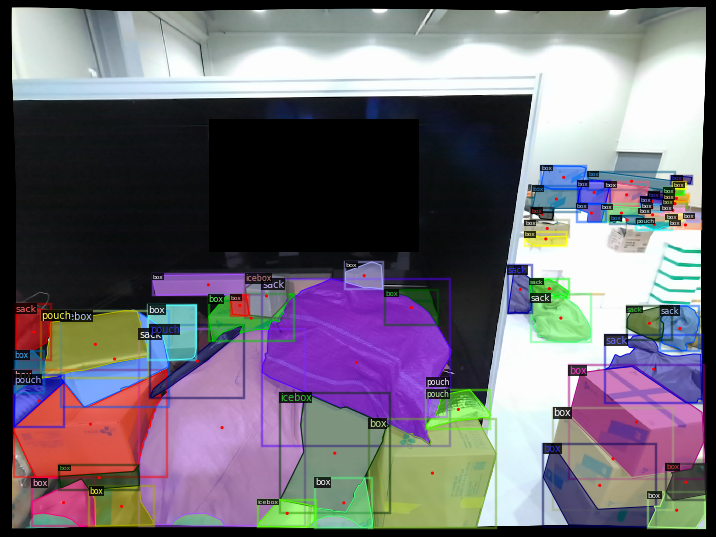

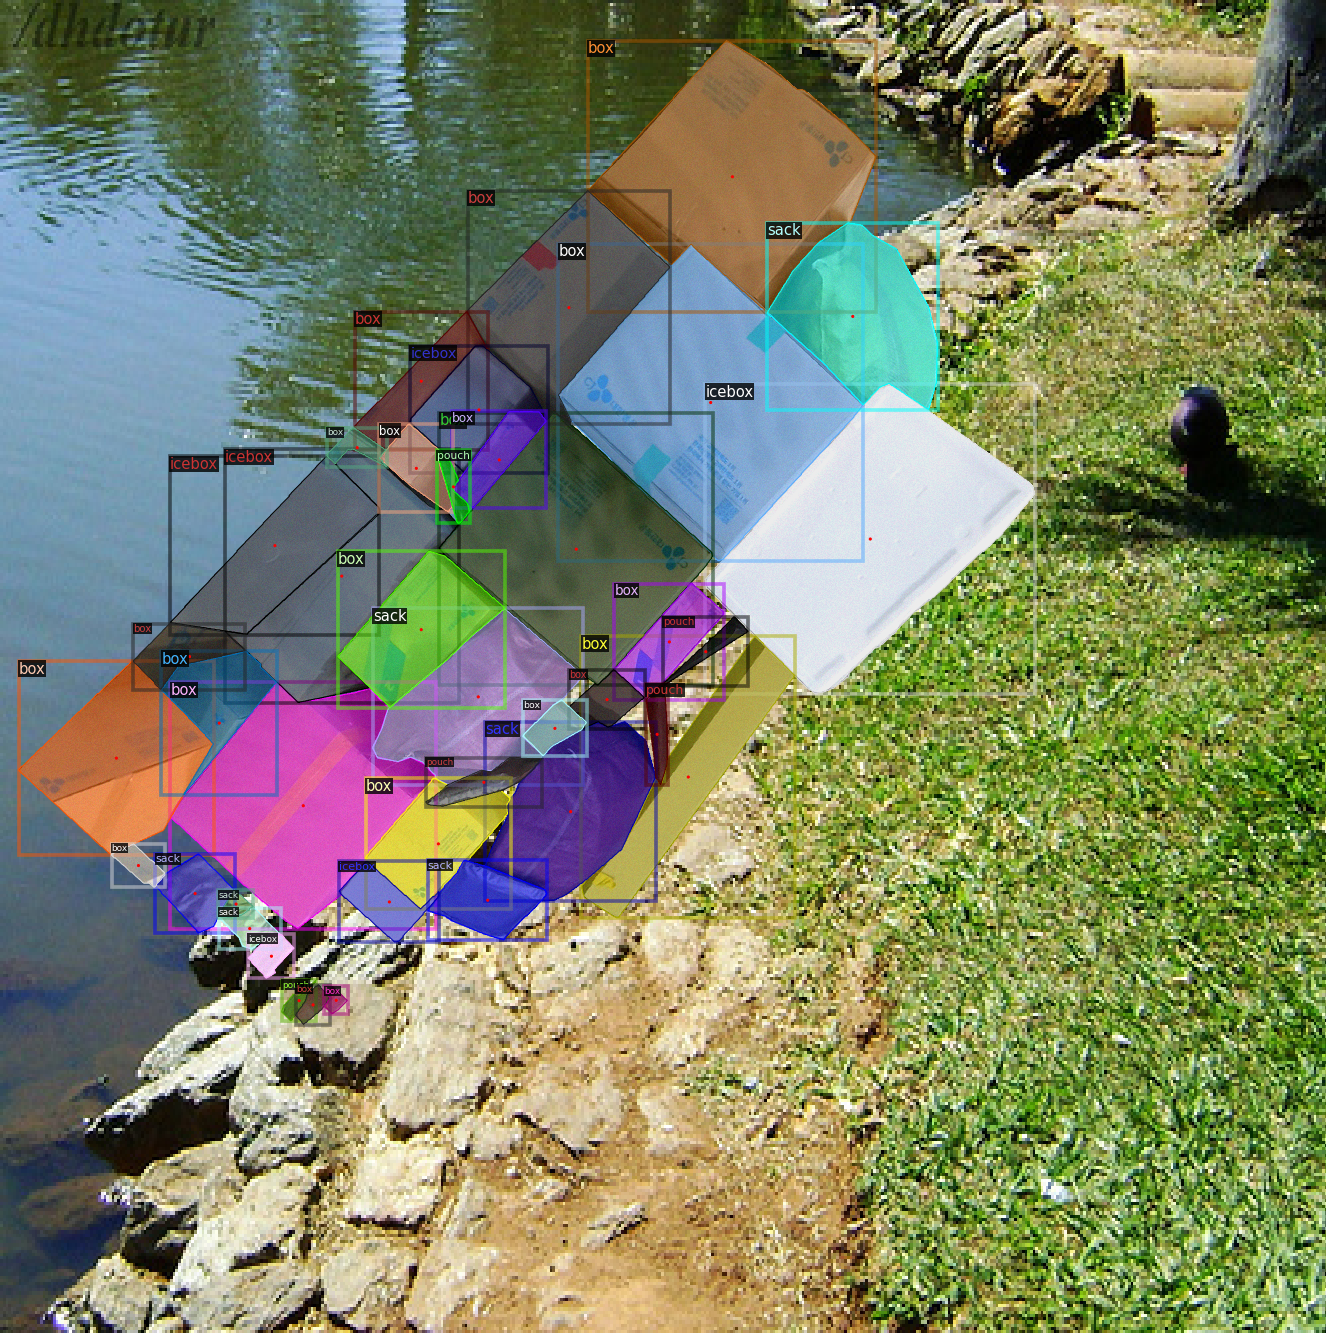

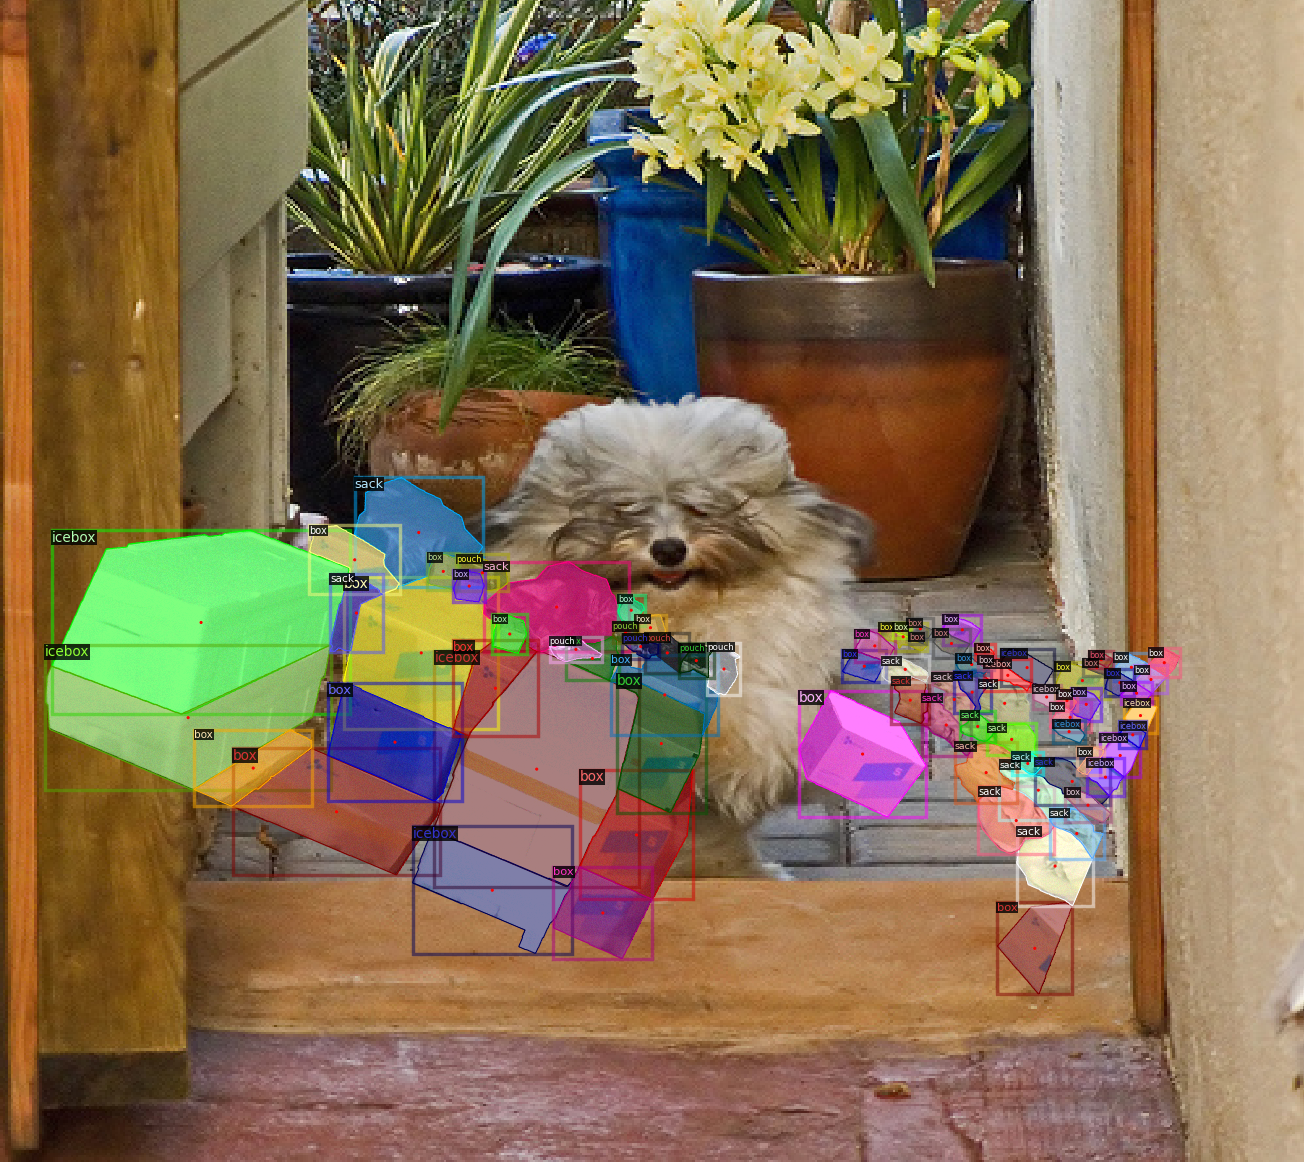

In [ ]:
import random

for d in random.sample(skku_train_dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=skku_train_metadata, scale=0.35)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
for d in random.sample(pk_val_dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=pk_val_metadata, scale=0.35)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the fruits_nuts dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU.


In [ ]:
#Prepare tensorboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


In [ ]:

LOG_DIR = '/content/output/'
print(LOG_DIR)
get_ipython().system_raw(
    'tensorboard --logdir --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')


In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
!rm -rf output/*

In [ ]:
!export CUDA_LAUNCH_BLOCKING=1

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

# Evaluation code from
#https://github.com/facebookresearch/detectron2/issues/810#issuecomment-596194293

# More detailed implementation at
#https://medium.com/@apofeniaco/training-on-detectron2-with-a-validation-set-and-plot-loss-on-it-to-avoid-overfitting-6449418fbf4e
##or
#https://tshafer.com/blog/2020/06/detectron2-eval-loss

from detectron2.engine import HookBase
from detectron2.data import build_detection_train_loader
import detectron2.utils.comm as comm
import torch
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2 import model_zoo

class MyTrainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):
    if output_folder is None:
      output_folder = os.path.join(cfg.OUTPUT_DIR,"inference")
    return COCOEvaluator(dataset_name, cfg, True, output_folder)

class ValidationLoss(HookBase):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg.clone()
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        self._loader = iter(build_detection_train_loader(self.cfg))
        
    def after_step(self):
        data = next(self._loader)
        with torch.no_grad():
            loss_dict = self.trainer.model(data)
            
            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            loss_dict_reduced = {"val_" + k: v.item() for k, v in 
                                 comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())
            if comm.is_main_process():
                self.trainer.storage.put_scalars(total_val_loss=losses_reduced, 
                                                 **loss_dict_reduced)

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") # for instance segmentation
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("skku_unloading_coco_train",)
cfg.DATASETS.TEST = ("skku_unloading_coco_test",)   # no metrics implemented for this dataset
cfg.DATASETS.VAL = ("skku_unloading_coco_val",)   # no metrics implemented for this dataset
cfg.TEST.EVAL_PERIOD = 500
cfg.DATALOADER.NUM_WORKERS = 4
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")  # initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.CHECKPOINT_PERIOD = 5000

# ********* Learning rate calc: https://github.com/facebookresearch/detectron2/issues/1128#issuecomment-774175041
num_gpu = 1
bs = (num_gpu * 2)
cfg.SOLVER.BASE_LR = 0.01 * bs / 128  # pick a good LR
# ********
cfg.SOLVER.MAX_ITER = 9000   # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 4 classes (box, icebox, pouch, sack)

#   ENABLE KEYPOINT REGRESSION
cfg.MODEL.KEYPOINT_ON = True
cfg.MODEL.ROI_KEYPOINT_HEAD.NUM_KEYPOINTS = 1
cfg.MODEL.ROI_KEYPOINT_HEAD.MIN_KEYPOINTS_PER_IMAGE = 0
cfg.TEST.KEYPOINT_OKS_SIGMAS = [1.0]

#   ENABLE INSTANCE SEGMENTATION
cfg.MODEL.MASK_ON =  True
cfg.MODEL.SEM_SEG_HEAD.LOSS_WEIGHT = 0.5

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = MyTrainer(cfg) # DefaultTrainer(cfg) # #
val_loss = ValidationLoss(cfg)  
trainer.register_hooks([val_loss])
# swap the order of PeriodicWriter and ValidationLoss
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
#trainer.resume_or_load(resume=True)
trainer.train()

[08/07 10:41:06 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/07 10:41:18 d2.data.datasets.coco]: Loaded 34 images in COCO format from ./val/val2.json
[08/07 10:41:18 d2.data.build]: Removed 0 images with no usable annotations. 34 images left.
[08/07 10:41:18 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    sack    | 160          |   pouch    | 320          |    box     | 572          |
|   icebox   | 107          |            |              |            |              |
|   total    | 1159         |            |              |            |              |
[08/07 10:41:18 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[08/07 10:41:18 d2.data.build]: Using training sampler TrainingSampler
[08/07 10:41:18 d2.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

[08/07 10:41:47 d2.utils.events]:  eta: 2:01:27  iter: 19  total_loss: 174.3  loss_cls: 55.74  loss_box_reg: 4.645  loss_mask: 1.341  loss_keypoint: 84.75  loss_rpn_cls: 5.115  loss_rpn_loc: 14.51  total_val_loss: 155.1  val_loss_cls: 50.93  val_loss_box_reg: 5.24  val_loss_mask: 1.12  val_loss_keypoint: 86.36  val_loss_rpn_cls: 5.744  val_loss_rpn_loc: 16.47  time: 0.8683  data_time: 0.2043  lr: 3.122e-06  max_mem: 3629M
[08/07 10:42:10 d2.utils.events]:  eta: 1:58:27  iter: 39  total_loss: 23.24  loss_cls: 7.555  loss_box_reg: 0.7232  loss_mask: 0.6969  loss_keypoint: 8.267  loss_rpn_cls: 1.256  loss_rpn_loc: 4.489  total_val_loss: 21.6  val_loss_cls: 6.651  val_loss_box_reg: 0.7342  val_loss_mask: 0.6518  val_loss_keypoint: 9.148  val_loss_rpn_cls: 1.262  val_loss_rpn_loc: 4.11  time: 0.8361  data_time: 0.0747  lr: 6.2439e-06  max_mem: 3793M
[08/07 10:42:34 d2.utils.events]:  eta: 1:55:23  iter: 59  total_loss: 12.13  loss_cls: 2.124  loss_box_reg: 0.2585  loss_mask: 0.6587  loss_ke

In [ ]:
print(cfg.MODEL.SEM_SEG_HEAD.LOSS_WEIGHT)

In [ ]:
!zip -r output.zip output
from google.colab import files
files.download('output.zip')

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

Now, we perform inference with the trained model on the fruits_nuts dataset. First, let's create a predictor using the model we just trained:



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("skku_unloading_coco_test", )
cfg.TEST.KEYPOINT_OKS_SIGMAS = [1.0]
predictor = DefaultPredictor(cfg)

Do evaluation

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("skku_unloading_coco_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "skku_unloading_coco_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator)) 

Then, we randomly select several samples to visualize the prediction results.

In [ ]:
from detectron2.utils.visualizer import ColorMode
import random 

for d in random.sample(skku_test_dataset_dicts, 5):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=skku_test_metadata, 
                   scale=0.4, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
skku_train_metadata

## Benchmark inference speed

In [ ]:
import time
times = []
for i in range(20):
    start_time = time.time()
    outputs = predictor(im)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

# Evaluate performance using pyCOCOtools

In [ ]:
!pip install pycocotools

In [ ]:
from pycocotools.coco import COCO 
from pycocotools.cocoeval import COCOeval 
import numpy as np 
import skimage.io as io 
import pylab,json 
from tempfile import NamedTemporaryFile

In [ ]:
def xyxy2xywh(bbox):
        """Convert ``xyxy`` style bounding boxes to ``xywh`` style for COCO
        evaluation.

        Args:
            bbox (numpy.ndarray): The bounding boxes, shape (4, ), in
                ``xyxy`` order.

        Returns:
            list[float]: The converted bounding boxes, in ``xywh`` order.
        """

        _bbox = bbox.tolist()
        return [
            _bbox[0],
            _bbox[1],
            _bbox[2] - _bbox[0],
            _bbox[3] - _bbox[1],
        ] 

import numpy as np                                 # (pip install numpy)
from skimage import measure                        # (pip install scikit-image)
from shapely.geometry import Polygon, MultiPolygon # (pip install Shapely)

def create_sub_mask_annotation(sub_mask, image_id, category_id, annotation_id, is_crowd, bbox, keypoints):
    # Find contours (boundary lines) around each sub-mask
    # Note: there could be multiple contours if the object
    # is partially occluded. (E.g. an elephant behind a tree)
    contours = measure.find_contours(sub_mask, 0.5, positive_orientation='low')

    segmentations = []
    polygons = []
    #print(len(contours))
    for contour in contours:
        # Flip from (row, col) representation to (x, y)
        # and subtract the padding pixel
        for i in range(len(contour)):
            row, col = contour[i]
            contour[i] = (col - 1, row - 1)

        # Make a polygon and simplify it
        poly = Polygon(contour)
        poly = poly.simplify(1.0, preserve_topology=False)
        polygons.append(poly)
        segmentation = np.array(poly.exterior.coords).ravel().tolist()
        if len(segmentation) > 4:
          segmentations.append(segmentation)

    # Combine the polygons to calculate the bounding box and area
    multi_poly = MultiPolygon(polygons)
    #x, y, max_x, max_y = multi_poly.bounds
    #width = max_x - x
    #height = max_y - y
    #bbox = (x, y, width, height)
    area = multi_poly.area

    annotation = {
        'segmentation': segmentations,
        'keypoints': keypoints,
        'iscrowd': is_crowd,
        'image_id': image_id,
        'category_id': category_id,
        'id': annotation_id,
        'bbox': bbox,
        'area': area
    }

    return segmentations

In [ ]:
# format all outputs into a list of dicts compatible with COCO

import pycocotools.mask as mask_util

#instances = outputs['instances']
#instances.pred_masks_rle = [mask_util.encode(np.asfortranarray(mask)) for mask in instances.pred_masks]
#for rle in instances.pred_masks_rle:
#    rle['counts'] = rle['counts'].decode('utf-8')
#instances.remove('pred_masks')

# TO TEST INVERT CONVERSION
#instances.pred_masks = np.stack([mask_util.decode(rle) for rle in instances.pred_masks_rle])

#Inspired from
# https://www.immersivelimit.com/create-coco-annotations-from-scratch

detection_res = []
is_crowd = 0
for k, d in enumerate(skku_test_dataset_dicts):   
#for k, d in  enumerate(random.sample(skku_test_dataset_dicts, 1)):    
 
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    outputs = outputs["instances"].to("cpu")

    bboxes = outputs.pred_boxes
    scores = outputs.scores
    classes = outputs.pred_classes
    masks = outputs.pred_masks
    keypoints = outputs.pred_keypoints
 
    #print("Image: ",k,"has {} masks".format(masks.shape[0]))

    #for i,(bbox, score, class_) in enumerate(zip(bboxes, scores, classes)):
    #  #print(i,bbox.tolist(), score.item(), class_.item(), d["image_id"])
    #  annotations = []
    #  for j, mask in enumerate(masks):
    #    #category_id = category_ids[image_id][color]
    #    annotation = create_sub_mask_annotation(mask, d["image_id"], class_, j, is_crowd, xyxy2xywh(bbox))
    #    annotations.append(annotation)
    #  #annotation_id += 1
    #  #image_id += 1


    for i,(bbox, score, class_, mask, keypoint) in enumerate(zip(bboxes, scores, classes, masks, keypoints)):

      annotation = create_sub_mask_annotation(mask, d["image_id"], class_, i, is_crowd, xyxy2xywh(bbox), keypoint)
      #annotations.append(annotation)

      detection_res.append({
          'score': score.item(),
          'category_id': class_.item(),
          'bbox': xyxy2xywh(bbox),
          'image_id': d["image_id"],
          'segmentation': annotation,
          'keypoints' : keypoint.tolist()
      })

In [ ]:
# json file in coco format, original annotation data
anno_file = '/content/test/test2.json'
coco_gt = COCO(anno_file)
 
 # Use GT box as prediction box for calculation, the purpose is to get detection_res

"""
detection_res = []
with open(anno_file, 'r') as f:
    json_file = json.load(f)
annotations = json_file['annotations']
detection_res = []
for i, anno in enumerate(annotations):
    detection_res.append({
        'score': 1,
        'category_id': anno['category_id'],
        'bbox': anno['bbox'],
        'image_id': anno['image_id']
    })
    if i < 1 :
      print( anno['category_id'], anno['image_id'])
"""
 
with NamedTemporaryFile(suffix='.json') as tf:
         # Due to subsequent needs, first convert detection_res to binary and then write it to the json file
    content = json.dumps(detection_res).encode(encoding='utf-8')
    tf.write(content)
    res_path = tf.name
 
         # loadRes will generate a new COCO type instance based on coco_gt and return
    coco_dt = coco_gt.loadRes(res_path)
 
    cocoEval = COCOeval(coco_gt, coco_dt, 'keypoints')  # use 'bbox' for bbox mAP or 'segm' for instance segmentation mAP
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()
 
print(cocoEval.stats)

In [ ]:
#mAP
mean_ap = cocoEval.stats[0].item()  # stats[0] records AP@[0.5:0.95]
print("mAP: ", mean_ap)

In [ ]:
print(coco_gt.getAnnIds())

In [ ]:
import json
import matplotlib.pyplot as plt

experiment_folder = './output/'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
print(len(experiment_metrics))
print(experiment_metrics[0].keys())

ax1.plot(
    [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
    [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], color="black", label="Total Loss")
ax1.plot(
    [x['iteration'] for x in experiment_metrics if 'total_val_loss' in x], 
    [x['total_val_loss'] for x in experiment_metrics if 'total_val_loss' in x], color="red", label="Val Loss")
    
ax1.tick_params(axis='y')
plt.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('AP')
ax2.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x], color=color, label="AP")
ax2.tick_params(axis='y')

plt.legend(loc='upper right')
plt.show()
